In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [131]:
# 1.Read the dataset (posted on Bs) into a dataframe.

titanic = pd.read_csv('Titanic.csv')

In [132]:
# 2. Explore the dataset and determine what is the target variable.

print(titanic.head())

# I have explored the dataset and determined that Survival is the target variable

   Passenger Class   Sex    Age Survived
0          1   3rd  Male  Child       No
1          2   3rd  Male  Child       No
2          3   3rd  Male  Child       No
3          4   3rd  Male  Child       No
4          5   3rd  Male  Child       No


In [133]:
# 3. Drop factor(s) that are not likely to be relevant for logistic regression.
titanic = titanic.drop(['Passenger'], axis = 1)
print(titanic.columns)

# I determined that passenger was not relevant due to it being a numerical variable that could have easily served as the index for this dataframe

Index(['Class', 'Sex', 'Age', 'Survived'], dtype='object')


In [134]:
# 4. Convert all categorical feature variables into dummy variables.

titanic_dummies = pd.get_dummies(titanic, columns = ['Class', 'Sex', 'Age'], drop_first= True)
print(titanic_dummies.head())

  Survived  Class_2nd  Class_3rd  Class_Crew  Sex_Male  Age_Child
0       No      False       True       False      True       True
1       No      False       True       False      True       True
2       No      False       True       False      True       True
3       No      False       True       False      True       True
4       No      False       True       False      True       True


In [135]:
# 5. Assign X and y.
y = titanic_dummies['Survived']
X = titanic_dummies.drop(['Survived'], axis=1)

print(X.columns)

Index(['Class_2nd', 'Class_3rd', 'Class_Crew', 'Sex_Male', 'Age_Child'], dtype='object')


In [137]:
# 6. Partition the data into train and test sets (70/30). Use random_state = 2024. Stratify the data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

print(X_train.head())

      Class_2nd  Class_3rd  Class_Crew  Sex_Male  Age_Child
1253      False      False        True      True      False
995       False      False        True      True      False
1034      False      False        True      True      False
256        True      False       False      True      False
1043      False      False        True      True      False


In [138]:
logReg = LogisticRegression(max_iter = 1000)

In [139]:
# 7. Fit the training data to a logistic regression model.
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [140]:

y_pred = logReg.predict(X_test)
print(y_pred)

['Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No'
 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' '

In [141]:
# 8. Display the accuracy of your predictions.
acc = logReg.score(X_test, y_test)
print(acc)

0.7806354009077155


In [143]:
# another way of calculating the accuracy score
print('The accuracy is: ', metrics.accuracy_score(y_test, y_pred))

The accuracy is:  0.7806354009077155


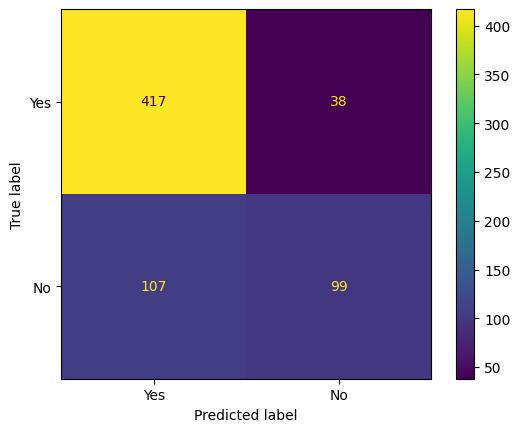

In [147]:
# 9. Plot the confusion matrix along with the labels (Yes, No).

cnf = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix = cnf, display_labels = ['Yes', 'No']).plot()

In [145]:
print(X.columns)

Index(['Class_2nd', 'Class_3rd', 'Class_Crew', 'Sex_Male', 'Age_Child'], dtype='object')


In [146]:
# 10. Now, display the predicted value of the survivability of a male adult passenger traveling in 3rd class. Pay attention to the order of the variables.

new_data = pd.DataFrame([['3rd', 'Male', 'Adult']], columns=['Class', 'Sex', 'Age'])


new_data_dummies = pd.get_dummies(new_data, columns=['Class','Sex','Age'], drop_first=True)


new_data_dummies = new_data_dummies.reindex(columns=X.columns, fill_value=0)


predicted_class = logReg.predict(new_data_dummies)[0]
predicted_prob_survive = logReg.predict_proba(new_data_dummies)[0, 1]

print("Predicted class (0 = Did not survive, 1 = Survived):", predicted_class)
print("Predicted survival probability:", predicted_prob_survive)





# new_data = pd.DataFrame([['3rd', 'Male', 'Adult']], columns=['Class', 'Sex', 'Age'])
# # Apply the same one-hot encoding as was applied to the training data

# new_data_dummies = pd.get_dummies(new_data)

# print(new_data_dummies.head())

# new_data_dummies = new_data_dummies.reindex(columns=titanic_dummies.columns, fill_value=0)

# # Predict the survivability (0 = did not survive, 1 = survived)
# predicted_class = logReg.predict(new_data_dummies)

# # Predict the survival probability

# Ensure the columns match the training data's columns
# Add missing columns with 0 and reindex to match the order
# missing_cols = set(X_dummies.columns) - set(new_data_dummies.columns)
# for c in missing_cols:
#     new_data_dummies[c] = 0
# new_data_dummies = new_data_dummies[X_dummies.columns]

# Make the prediction


Predicted class (0 = Did not survive, 1 = Survived): Yes
Predicted survival probability: 0.8687097730707092
